In [1]:
import torch,gensim

from src.dataset import FactsOrAnalysisDataset
from src.factsoranalysis import FactsOrAnalysis
from src.train import trainIters

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

You have to manually download the pretrained embeddings file from [Jean-Philippe Fauconnier's website](https://fauconnier.github.io/), in particular, the cbow FrWac file with cut-off of 100 ([link](http://embeddings.net/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin)). 

In [2]:
embeddings_file="../frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
train_ds="data/train_data.csv"
valid_ds="data/valid_data.csv"
train_ds=FactsOrAnalysisDataset(train_ds,embeddings_file=embeddings_file)
valid_ds=FactsOrAnalysisDataset(valid_ds,embeddings_file=embeddings_file)

In [3]:
embeddings = gensim.models.KeyedVectors.load_word2vec_format(embeddings_file,binary=True,unicode_errors='ignore')
embeddings_tensor = torch.FloatTensor(embeddings.vectors)
model=FactsOrAnalysis(embeddings_tensor).to(device)

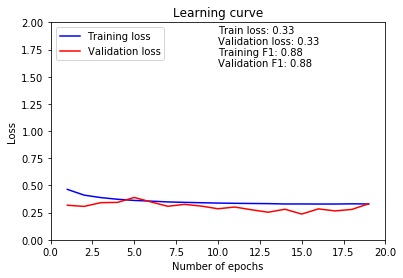

In [4]:
## CONFIG
batch_size=64
n_epochs=20
learning_rate=1e-3
weight_decay=0
clip=.2
## /CONFIG

_,_=trainIters(model,train_ds,valid_ds,batch_size,n_epochs,learning_rate,weight_decay,clip)

In [5]:
torch.save(model.state_dict(),"facts_or_analysis.pt")